# import needed libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer

import numpy as np
from sklearn.model_selection import train_test_split

# Get the data set

In [2]:
df = pd.read_csv('insurance_dataset.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Check if we have missing values

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
"""
y= df["charges"]
X=df.loc[:, df.columns != "charges"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
"""
from sklearn.preprocessing import LabelEncoder
"""
df['sex']= df['sex'].map({1:"male",2:"female"})
df['sex']=LabelEncoder.fit_transform(df['sex'])
"""




#select what we want to predict
target_col= df['charges']
df.drop('charges', axis=1, inplace=True)


#df=pd.get_dummies(df, columns=['sex','smoker'])


In [7]:
needs_encoding= df.select_dtypes(exclude=['number'])

In [8]:
no_need_encode=df.select_dtypes(exclude=['object'])

In [9]:
onehot = OneHotEncoder()

encoded_col = onehot.fit_transform(needs_encoding)
encoded_df = pd.DataFrame(encoded_col.toarray(), columns=onehot.get_feature_names_out())


In [10]:
final_df = pd.concat([no_need_encode,encoded_df,target_col], axis=1)

In [11]:
final_df.info

<bound method DataFrame.info of       age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0      19  27.900         0         1.0       0.0        0.0         1.0   
1      18  33.770         1         0.0       1.0        1.0         0.0   
2      28  33.000         3         0.0       1.0        1.0         0.0   
3      33  22.705         0         0.0       1.0        1.0         0.0   
4      32  28.880         0         0.0       1.0        1.0         0.0   
...   ...     ...       ...         ...       ...        ...         ...   
1333   50  30.970         3         0.0       1.0        1.0         0.0   
1334   18  31.920         0         1.0       0.0        1.0         0.0   
1335   18  36.850         0         1.0       0.0        1.0         0.0   
1336   21  25.800         0         1.0       0.0        1.0         0.0   
1337   61  29.070         0         1.0       0.0        0.0         1.0   

      region_northeast  region_northwest  region_southe

In [20]:
Y = final_df["charges"]
X= final_df.drop("charges" , axis=1)


X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
regressor = LinearRegression()

regressor.fit(X_train, Y_train)

Y_pred = regressor.predict(X_test)

comparison = pd.DataFrame({
    'Actual Charges': Y_test[:10],
    'Predicted Charges': Y_pred[:10]
})
print("First 10 Actual vs Predicted Charges values:")
print(comparison)

mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error (MSE):", mse)

r_squared = r2_score(Y_test, Y_pred)
print(f"R squared: {r_squared}")

First 10 Actual vs Predicted Charges values:
      Actual Charges  Predicted Charges
764       9095.06825        8969.550274
887       5272.17580        7068.747443
890      29330.98315       36858.410912
1293      9301.89355        9454.678501
259      33750.29180       26973.173457
1312      4536.25900       10864.113164
899       2117.33885         170.280841
752      14210.53595       16903.450287
1286      3732.62510        1092.430936
707      10264.44210       11218.343184
Mean Squared Error (MSE): 33596915.85136147
R squared: 0.7835929767120723


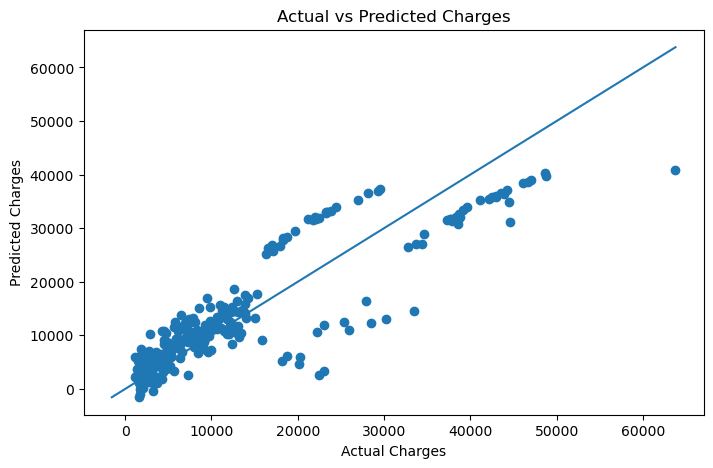

In [30]:
plt.figure(figsize=(8, 5))

plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
# Line y = x for reference (perfect prediction)
# Find the smallest value across both actual and predicted MPG
min_val = min(Y_test.min(), Y_pred.min())
# Find the largest value across both actual and predicted MPG
max_val = max(Y_test.max(), Y_pred.max())
# Plot a straight line between (min_val, min_val) and (max_val, max_val)
plt.plot([min_val, max_val], [min_val, max_val])

plt.show()
